In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
cols = ['child_mort','exports']
data = df[cols]
data.shape

(167, 2)

In [4]:
mm = MinMaxScaler()
df_scaled = pd.DataFrame(mm.fit_transform(data), columns=data.columns)
df_scaled.head()


,child_mort,exports
0,0.426485,0.049482
1,0.068160,0.139531
2,0.120253,0.191559
3,0.566699,0.311125
4,0.037488,0.227079


In [7]:

km = KMeans(n_clusters=6,
                     init='k-means++',
                     random_state=42,
                     n_init='auto')
km.fit(df_scaled)
df['label'] = km.labels_
df_scaled['label'] = km.labels_

df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


<Axes: xlabel='child_mort', ylabel='exports'>

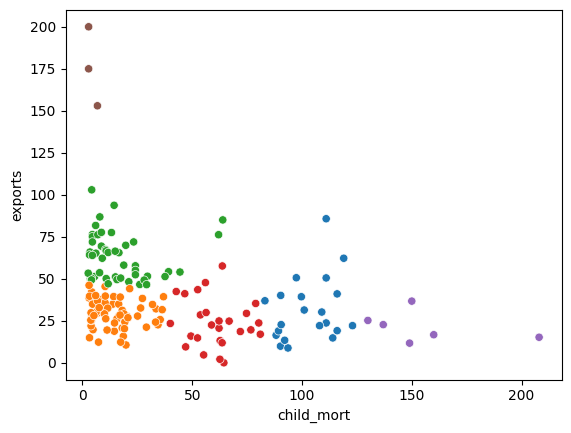

In [6]:
sb.scatterplot(data=df,x=cols[0],y=cols[1],hue=[(sb.color_palette('bright'))[l] for l in df['label']],legend=False)